In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [4]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_and_forecast_DATASET.csv']))
print(df)

                  FullDate  Tmax     SysLoad  GasPrice  ElecPrice
0      2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
1      2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2      2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
3      2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
4      2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                    ...   ...         ...       ...        ...
92011  2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
92012  2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
92013  2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
92014  2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
92015  2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 5 columns]


In [5]:
df.shape

(92016, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [7]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [8]:
df.isnull().values.any()

False

Text(0, 0.5, 'Tmax')

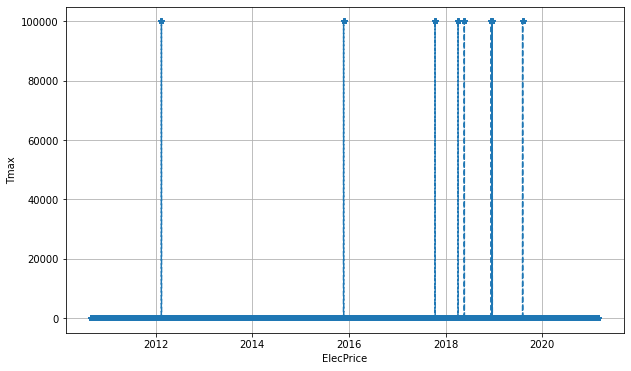

In [35]:
import pandas as pd
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace=True)
plt.figure(figsize=(10,5))
plt.plot(df.index, df.Tmax,'--', marker='*')
plt.grid()
plt.xlabel('ElecPrice')
plt.ylabel('Tmax')

In [4]:
import pandas as pd
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace=True)
df_quarterly = df.resample('3M').sum()

In [5]:
print(df_quarterly)

                 Tmax       SysLoad    GasPrice   ElecPrice
FullDate                                                   
2010-09-30    12172.8  1.136265e+06   2576.6376   18054.645
2010-12-31    53280.0  2.914292e+06   5541.6528   45872.860
2011-03-31    60626.4  2.622655e+06   7338.4752  113511.665
2011-06-30    41644.8  2.494152e+06   8453.5944   66821.810
2011-09-30    39979.2  2.338142e+06   8540.3688   77611.055
2011-12-31    56484.0  2.282135e+06   7527.9528   69753.610
2012-03-31  2461555.2  2.367996e+06   7730.1696   57105.615
2012-06-30    41961.6  2.444523e+06   9240.1416   61455.885
2012-09-30    37480.8  2.286982e+06  13089.5904  145165.920
2012-12-31    58219.2  2.213114e+06   9603.8160  124628.215
2013-03-31    64488.0  2.601158e+06  10339.0704  126191.170
2013-06-30    44308.8  2.316255e+06  10992.3144  214997.700
2013-09-30    40898.4  1.896003e+06  11223.4680  148959.630
2013-12-31    55960.8  1.910785e+06   8864.0328  137807.140
2014-03-31    64514.4  2.311551e+06   91

In [7]:
import pandas as pd
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace=True)
df_daily = df.resample('D').sum()
print(df_daily)

             Tmax      SysLoad  GasPrice  ElecPrice
FullDate                                           
2010-09-01  379.2  41565.38000   88.5600   2751.700
2010-09-02  369.6  38898.99000   88.5600    570.810
2010-09-03  439.2  41665.76000  106.8000    504.975
2010-09-04  328.8  35638.08500   81.3600    502.275
2010-09-05  357.6  35611.41000  106.8000    500.555
...           ...          ...       ...        ...
2021-02-24  537.6  -1525.49745  134.4000    634.770
2021-02-25  518.4   4539.07855  130.5048    577.515
2021-02-26  547.2   9517.02430  130.1808   1445.495
2021-02-27  564.0   4932.88015  130.0800    488.980
2021-02-28  583.2   6675.05485  131.6352    -98.985

[3834 rows x 4 columns]


In [12]:
!pip install matplotlib

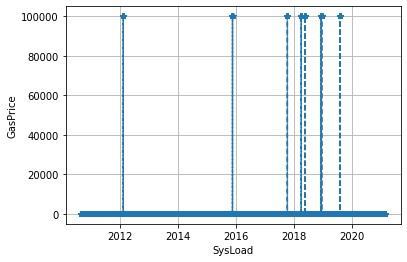

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
plt.plot(df.index, df.Tmax,'--', marker='*')
plt.grid()
plt.xlabel('SysLoad')
plt.ylabel('GasPrice')
plt.show()